# Approach of the problem


* Load the data and libraries
* Data preparation
* Visualization
* Data Analysis
      1. uni variate  
      2. bi variate
      3. multivariate
* supervised
      1. classification
         * Logistic regression
         * Decision Tree
         * Random Forest
         * Boosting
* Evaluate the model
* Apply the model to test data
* Evaluate the result using the submission



# Load libraries and data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:
!unzip '/content/stayalert (4).zip'

Archive:  /content/stayalert (4).zip
  inflating: Solution.csv            
  inflating: example_submission.csv  
  inflating: fordTest.csv            
  inflating: fordTrain.csv           


In [3]:
train =pd.read_csv('/content/fordTrain.csv')
test = pd.read_csv('/content/fordTest.csv')
submission= pd.read_csv('/content/example_submission.csv')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604329 entries, 0 to 604328
Data columns (total 33 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   TrialID  604329 non-null  int64  
 1   ObsNum   604329 non-null  int64  
 2   IsAlert  604329 non-null  int64  
 3   P1       604329 non-null  float64
 4   P2       604329 non-null  float64
 5   P3       604329 non-null  int64  
 6   P4       604329 non-null  float64
 7   P5       604329 non-null  float64
 8   P6       604329 non-null  int64  
 9   P7       604329 non-null  float64
 10  P8       604329 non-null  int64  
 11  E1       604329 non-null  float64
 12  E2       604329 non-null  float64
 13  E3       604329 non-null  int64  
 14  E4       604329 non-null  int64  
 15  E5       604329 non-null  float64
 16  E6       604329 non-null  int64  
 17  E7       604329 non-null  int64  
 18  E8       604329 non-null  int64  
 19  E9       604329 non-null  int64  
 20  E10      604329 non-null  

In [5]:
train.skew()

TrialID     0.024138
ObsNum      0.000214
IsAlert    -0.319185
P1          2.445986
P2          0.863450
P3          0.507984
P4          0.643117
P5         20.225034
P6         89.789752
P7          1.937124
P8          0.000000
E1          0.766075
E2          0.754220
E3          3.352342
E4         -2.467771
E5          0.175100
E6         -0.469872
E7          2.844119
E8          2.200218
E9         -2.292728
E10        -0.433540
E11         4.062888
V1         -0.941470
V2         -0.759452
V3          0.261053
V4          5.144928
V5          1.667496
V6         -0.871827
V7          0.000000
V8          0.406715
V9          0.000000
V10        -1.172114
V11        21.165566
dtype: float64

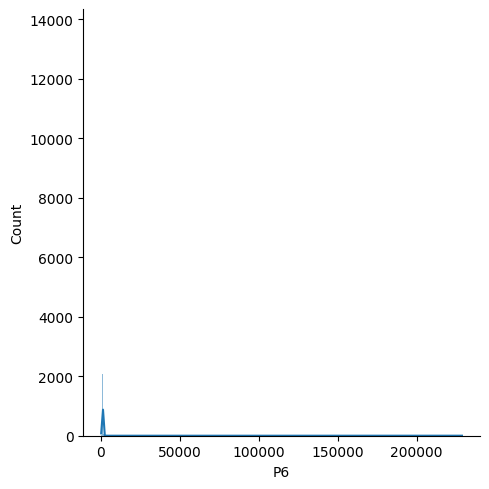

In [6]:
sns.displot(train['P6'],kde=True)

<Axes: >

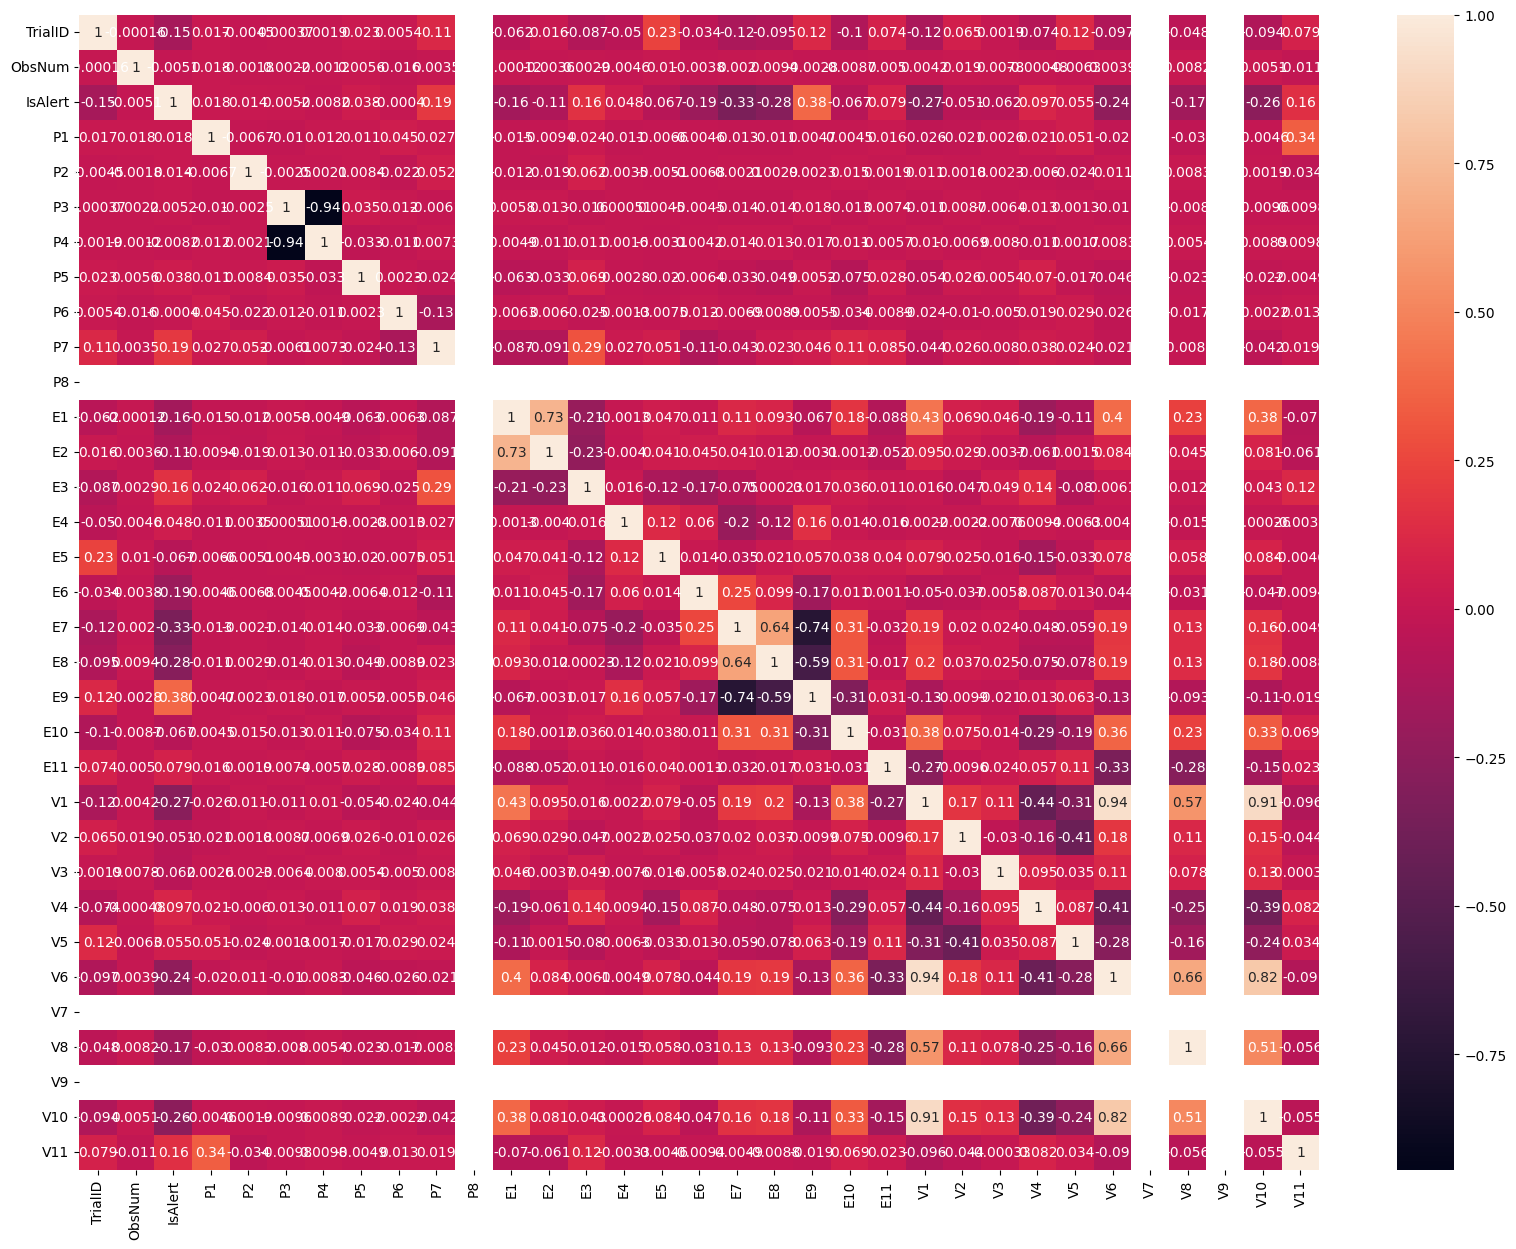

In [7]:
plt.figure(figsize=(20, 15))
sns.heatmap(train.corr(), annot=True)

In [8]:
train.corr()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
TrialID,1.000000,-0.000162,-0.145816,0.016772,-0.004473,0.000369,0.001880,0.022632,0.005377,0.111903,...,0.065063,0.001900,-0.074320,0.123721,-0.097389,NaN,-0.047593,NaN,-0.093818,0.078887
ObsNum,-0.000162,1.000000,-0.005143,0.018324,-0.001764,0.002199,-0.001191,0.005568,-0.015791,0.003498,...,0.019009,0.007753,-0.000480,-0.006284,0.003935,NaN,0.008191,NaN,0.005145,-0.011465
IsAlert,-0.145816,-0.005143,1.000000,0.018361,0.014383,0.005168,-0.008177,0.038160,-0.000400,0.189796,...,-0.050740,-0.062000,0.097022,0.055429,-0.244150,NaN,-0.165550,NaN,-0.259607,0.155722
P1,0.016772,0.018324,0.018361,1.000000,-0.006674,-0.010317,0.011704,0.010911,0.045429,0.027461,...,-0.021118,0.002551,0.021404,0.051348,-0.019792,NaN,-0.029747,NaN,-0.004563,0.344636
P2,-0.004473,-0.001764,0.014383,-0.006674,1.000000,-0.002539,0.002132,0.008390,-0.022003,0.052171,...,0.001779,0.002272,-0.006038,-0.023902,0.010608,NaN,0.008257,NaN,0.001946,-0.034248
P3,0.000369,0.002199,0.005168,-0.010317,-0.002539,1.000000,-0.944435,0.035129,0.012444,-0.006097,...,0.008651,-0.006380,0.013045,0.001312,-0.010245,NaN,-0.007963,NaN,-0.009630,-0.009808
P4,0.001880,-0.001191,-0.008177,0.011704,0.002132,-0.944435,1.000000,-0.032897,-0.010627,0.007323,...,-0.006926,0.008049,-0.010905,0.001705,0.008348,NaN,0.005379,NaN,0.008906,0.009841
P5,0.022632,0.005568,0.038160,0.010911,0.008390,0.035129,-0.032897,1.000000,0.002314,-0.023628,...,0.026232,0.005371,0.070290,-0.016671,-0.046353,NaN,-0.023359,NaN,-0.022193,-0.004897
P6,0.005377,-0.015791,-0.000400,0.045429,-0.022003,0.012444,-0.010627,0.002314,1.000000,-0.125580,...,-0.010418,-0.004996,0.019121,0.029222,-0.025728,NaN,-0.016850,NaN,-0.002163,0.012783
P7,0.111903,0.003498,0.189796,0.027461,0.052171,-0.006097,0.007323,-0.023628,-0.125580,1.000000,...,0.025850,0.007986,0.037711,0.024499,-0.020696,NaN,-0.008450,NaN,-0.041814,0.019360


# Data Preprocessing

In [9]:
y=train['IsAlert']
x= train.iloc[:,3:]

In [10]:
print(y)
print(x)

0         0
1         0
2         0
3         0
4         0
         ..
604324    1
604325    1
604326    1
604327    1
604328    1
Name: IsAlert, Length: 604329, dtype: int64
             P1        P2    P3       P4        P5   P6        P7  P8      E1  \
0       34.7406   9.84593  1400  42.8571  0.290601  572  104.8950   0   0.000   
1       34.4215  13.41120  1400  42.8571  0.290601  572  104.8950   0   0.000   
2       34.3447  15.18520  1400  42.8571  0.290601  576  104.1670   0   0.000   
3       34.3421   8.84696  1400  42.8571  0.290601  576  104.1670   0   0.000   
4       34.3322  14.69940  1400  42.8571  0.290601  576  104.1670   0   0.000   
...         ...       ...   ...      ...       ...  ...       ...  ..     ...   
604324  32.0051  10.13240   800  75.0000  0.081731  680   88.2353   0  17.807   
604325  32.0393  12.45040   800  75.0000  0.081731  680   88.2353   0  17.807   
604326  32.0762  10.06180   800  75.0000  0.081731  680   88.2353   0  17.807   
604327  32.115

In [11]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size= 0.2,random_state= 123)

In [12]:
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(483463, 30)
(120866, 30)
(483463,)
(120866,)


# Multivariate

# Logistic Regression

In [13]:
log_reg= LogisticRegression(max_iter=1000)
log_reg.fit(xtrain,ytrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [14]:
y_hat_train_log_reg= log_reg.predict(xtrain)
y_hat_test_log_reg= log_reg.predict(xtest)

In [15]:
def model_eval(actual,predicted):
     conf_matrix=confusion_matrix(actual,predicted)
     acc_score= accuracy_score(actual,predicted)
     clas_rep=classification_report(actual,predicted)
     print(conf_matrix)
     print(' the accuracy  is:',acc_score)
     print(clas_rep)


In [16]:
model_eval(ytrain,y_hat_train_log_reg)

[[138685  64642]
 [ 54175 225961]]
 the accuracy  is: 0.7542376562425667
              precision    recall  f1-score   support

           0       0.72      0.68      0.70    203327
           1       0.78      0.81      0.79    280136

    accuracy                           0.75    483463
   macro avg       0.75      0.74      0.75    483463
weighted avg       0.75      0.75      0.75    483463



In [17]:
model_eval(ytest,y_hat_test_log_reg)

[[34935 16282]
 [13539 56110]]
 the accuracy  is: 0.7532722188208429
              precision    recall  f1-score   support

           0       0.72      0.68      0.70     51217
           1       0.78      0.81      0.79     69649

    accuracy                           0.75    120866
   macro avg       0.75      0.74      0.75    120866
weighted avg       0.75      0.75      0.75    120866



DECISION TREE CLASSIFIER

In [18]:
dtree= DecisionTreeClassifier()
dtree.fit(xtrain,ytrain)
y_hat_train_dtree= dtree.predict(xtrain)
y_hat_test_dtree= dtree.predict(xtest)

In [19]:
model_eval(ytrain,y_hat_train_dtree)


[[203327      0]
 [     0 280136]]
 the accuracy  is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [20]:
model_eval(ytest,y_hat_test_dtree)

[[50493   724]
 [  783 68866]]
 the accuracy  is: 0.9875316466169146
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     51217
           1       0.99      0.99      0.99     69649

    accuracy                           0.99    120866
   macro avg       0.99      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



# Rnadom forest classifier

In [21]:
rf=RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [22]:
y_hat_train_rf= rf.predict(xtrain)
y_hat_test_rf= rf.predict(xtest)

In [23]:
model_eval(ytrain,y_hat_train_rf)


[[203327      0]
 [     0 280136]]
 the accuracy  is: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    203327
           1       1.00      1.00      1.00    280136

    accuracy                           1.00    483463
   macro avg       1.00      1.00      1.00    483463
weighted avg       1.00      1.00      1.00    483463



In [24]:
model_eval(ytest,y_hat_test_rf)

[[50674   543]
 [   83 69566]]
 the accuracy  is: 0.9948207105389439
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     51217
           1       0.99      1.00      1.00     69649

    accuracy                           0.99    120866
   macro avg       1.00      0.99      0.99    120866
weighted avg       0.99      0.99      0.99    120866



# IMPORTANCES

In [25]:
importances= rf.feature_importances_

In [26]:
importances_df= pd.DataFrame({'features':xtrain.columns,'importance': importances})

In [27]:
importances_df

,features,importance
0,P1,0.027776
1,P2,0.005168
2,P3,0.011463
3,P4,0.011515
4,P5,0.046375
5,P6,0.055362
6,P7,0.057995
7,P8,0.000000
8,E1,0.015050
9,E2,0.022859


# Ada boost classifier

In [28]:
ada=AdaBoostClassifier(n_estimators=100)
ada.fit(xtrain,ytrain)
y_hat_train_ada= ada.predict(xtrain)
y_hat_test_ada= ada.predict(xtest)

In [29]:
model_eval(ytrain,y_hat_train_ada)

[[160509  42818]
 [ 24340 255796]]
 the accuracy  is: 0.8610896800789305
              precision    recall  f1-score   support

           0       0.87      0.79      0.83    203327
           1       0.86      0.91      0.88    280136

    accuracy                           0.86    483463
   macro avg       0.86      0.85      0.86    483463
weighted avg       0.86      0.86      0.86    483463



In [30]:
model_eval(ytest,y_hat_test_ada)

[[40521 10696]
 [ 5929 63720]]
 the accuracy  is: 0.8624509787698774
              precision    recall  f1-score   support

           0       0.87      0.79      0.83     51217
           1       0.86      0.91      0.88     69649

    accuracy                           0.86    120866
   macro avg       0.86      0.85      0.86    120866
weighted avg       0.86      0.86      0.86    120866



# gradient  boost classifier

In [31]:
gb=GradientBoostingClassifier(n_estimators=150)
gb.fit(xtrain,ytrain)


GradientBoostingClassifier(n_estimators=150)

In [32]:
y_hat_train_gb= gb.predict(xtrain)
y_hat_test_gb= gb.predict(xtest)

In [33]:
model_eval(ytrain,y_hat_train_gb)

[[168085  35242]
 [ 14131 266005]]
 the accuracy  is: 0.8978763628240424
              precision    recall  f1-score   support

           0       0.92      0.83      0.87    203327
           1       0.88      0.95      0.92    280136

    accuracy                           0.90    483463
   macro avg       0.90      0.89      0.89    483463
weighted avg       0.90      0.90      0.90    483463



In [34]:
model_eval(ytest,y_hat_test_gb)

[[42318  8899]
 [ 3449 66200]]
 the accuracy  is: 0.8978372743368689
              precision    recall  f1-score   support

           0       0.92      0.83      0.87     51217
           1       0.88      0.95      0.91     69649

    accuracy                           0.90    120866
   macro avg       0.90      0.89      0.89    120866
weighted avg       0.90      0.90      0.90    120866



# xg boost classifier

In [35]:
from xgboost import XGBClassifier

In [36]:
xg=XGBClassifier(n_estimators= 100)
xg.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
y_hat_train_xg= xg.predict(xtrain)
y_hat_test_xg= xg.predict(xtrain)


In [38]:
model_eval(ytrain,y_hat_train_xg)

[[186745  16582]
 [  3842 276294]]
 the accuracy  is: 0.9577547816482337
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    203327
           1       0.94      0.99      0.96    280136

    accuracy                           0.96    483463
   macro avg       0.96      0.95      0.96    483463
weighted avg       0.96      0.96      0.96    483463



In [39]:
model_eval(ytrain,y_hat_test_xg)

[[186745  16582]
 [  3842 276294]]
 the accuracy  is: 0.9577547816482337
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    203327
           1       0.94      0.99      0.96    280136

    accuracy                           0.96    483463
   macro avg       0.96      0.95      0.96    483463
weighted avg       0.96      0.96      0.96    483463



# Application on Test Data

In [40]:
test.head()

,TrialID,ObsNum,IsAlert,P1,P2,P3,P4,P5,P6,P7,...,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
0,0,0,?,38.4294,10.9435,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1937
1,0,1,?,38.3609,15.3212,1000,60.0,0.302277,508,118.110,...,0.00,255,4.50625,0,2127,0,17.6,0,4,16.1744
2,0,2,?,38.2342,11.5140,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1602
3,0,3,?,37.9304,12.2615,1000,60.0,0.302277,508,118.110,...,0.07,255,4.50625,0,2131,0,17.6,0,4,16.1725
4,0,4,?,37.8085,12.3666,1000,60.0,0.302277,504,119.048,...,0.00,255,4.50625,0,2136,0,17.6,0,4,16.1459


In [41]:
x_variable = test.iloc[: , 3:]

In [42]:
test['IsAlert'] = rf.predict(x_variable)

In [43]:
test['IsAlert'].head()

0    1
1    1
2    1
3    1
4    1
Name: IsAlert, dtype: int64

In [44]:
solution = pd.read_csv('/content/Solution.csv')

In [45]:
solution.head()

,TrialID,ObsNum,Prediction,Indicator
0,0,0,1,Public
1,0,1,1,Public
2,0,2,1,Private
3,0,3,1,Private
4,0,4,1,Private


In [46]:
comparison = solution['Prediction'] == test['IsAlert']

In [47]:
print(comparison)

0         True
1         True
2         True
3         True
4         True
          ... 
120835    True
120836    True
120837    True
120838    True
120839    True
Length: 120840, dtype: bool
